# FPA pathogen susceptibility

What's this notebook about?

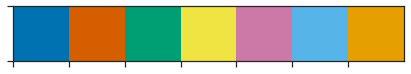

In [13]:
import sys
import os
import re
from glob import glob
import random
import itertools as it

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sinaplot import sinaplot
from statsmodels.stats.multitest import multipletests

## Default plotting params

%matplotlib inline
sns.set(font='Arial')
plt.rcParams['svg.fonttype'] = 'none'
style = sns.axes_style('white')
style.update(sns.axes_style('ticks'))
style['xtick.major.size'] = 2
style['ytick.major.size'] = 2
sns.set(font_scale=1.4, style=style)
pal = sns.color_palette(['#0072b2', '#d55e00', '#009e73', '#f0e442', '#cc79a7', '#56b4e9', '#e69f00'])
cmap = ListedColormap(pal.as_hex())
sns.set_palette(pal)
sns.palplot(pal)
plt.show()

In [2]:
pathogen_exp = pd.read_csv('data/fpa_35SFPA_pathogen_exp.csv', sep=',', usecols=[0, 1, 2])
pathogen_exp.head()

,Plant,experiment,spores
0,col0,1,0
1,col0,1,0
2,col0,1,0
3,col0,1,0
4,col0,1,0


In [16]:
comp = []
for a, b in it.combinations(set(pathogen_exp['Plant']), r=2):
    _, p = stats.ttest_ind(
        pathogen_exp.query(f'Plant == "{a}"').spores,
        pathogen_exp.query(f'Plant == "{b}"').spores
    )
    comp.append([a, b, p])

ttest_comps = pd.DataFrame(comp, columns=['cond_a', 'cond_b', 'pval'])
_, ttest_comps['fdr'], *_ = multipletests(ttest_comps['pval'], method='FDR_BH')
ttest_comps['sig'] = ttest_comps['fdr'] < 0.05
ttest_comps

,cond_a,cond_b,pval,fdr,sig
0,fpa8,ksk1,4.235406e-13,1.270622e-12,True
1,fpa8,FPAc,4.557333e-01,4.557333e-01,False
2,fpa8,col0,4.534404e-08,8.852322e-08,True
3,fpa8,35SFPA,4.721239e-08,8.852322e-08,True
4,fpa8,fpa7,1.023030e-07,1.705050e-07,True
5,ksk1,FPAc,5.398317e-09,1.349579e-08,True
6,ksk1,col0,6.639949e-31,9.959924e-30,True
7,ksk1,35SFPA,1.679544e-02,1.937935e-02,True
8,ksk1,fpa7,1.238279e-28,9.287094e-28,True
9,FPAc,col0,1.721873e-06,2.582810e-06,True


In [29]:
pathogen_exp.groupby('Plant').spores.median()

Plant
35SFPA    3
FPAc      0
col0      0
fpa7      0
fpa8      0
ksk1      5
Name: spores, dtype: int64

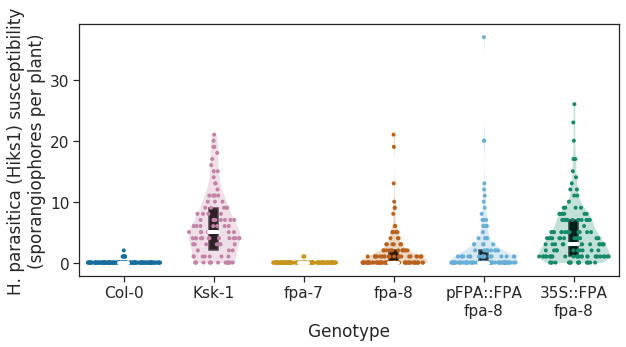

In [28]:
fig, ax = plt.subplots(figsize=(9, 5))
sinaplot(
    x='Plant',
    y='spores',
    order=['col0', 'ksk1', 'fpa7', 'fpa8', 'FPAc', '35SFPA'],
    palette=[pal[0], pal[4], pal[-1], pal[1], pal[-2], pal[2]],
    data=pathogen_exp, point_size=4,
    bw=0.3, cut=0, linewidth=0,
)
sns.boxplot(
    x='Plant',
    y='spores',
    order=['col0', 'ksk1', 'fpa7', 'fpa8', 'FPAc', '35SFPA'],
    data=pathogen_exp, width=0.1, showfliers=False,
    showcaps=False, whis=False,
    boxprops=dict(facecolor='#000000'),
    medianprops=dict(color='#ffffff', lw=4, zorder=2)
)
ax.set_xlabel('Genotype')
ax.set_ylabel('H. parasitica (Hiks1) susceptibility\n(sporangiophores per plant)')
ax.set_xticklabels(['Col-0', 'Ksk-1', 'fpa-7', 'fpa-8', 'pFPA::FPA\nfpa-8', '35S::FPA\nfpa-8'])
plt.tight_layout()
plt.savefig('figures/fpa_35SFPA_pathogen_exp.svg')
plt.show()